In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('data/stud.csv')

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
df.shape

(1000, 8)

In [23]:
#checking missing values 
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There are no missing values in the data set

In [24]:
#checking duplicates 
df.duplicated().sum()

0

### No duplicates found

In [25]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [26]:
#checking the number of unique values in the dataset
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [27]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### insight
from above description of numerical data all the means are very close to each other
from above description of numerical data all the std are very close to each other
while there is a minimum score 0 for math for writting minimum is much higher =10 and for myet higher =17

In [28]:
### Exploring Data

df.head()

d

In [29]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
print("Categories in 'gender' variable  ",end=" ")
print(df['gender'].unique())
print("Categories in 'parental level of education' variable  ",end=" ")
print(df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())
print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable   ['female' 'male']
Categories in 'parental level of education' variable   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


#### define categorical and numerical data

In [33]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print('we have {} numerical feature: {}'.format(len(numerical_features),numerical_features))
print('\nwe have {} categorical feature: {}'.format(len(categorical_feature),categorical_feature))

we have 3 numerical feature: ['math_score', 'reading_score', 'writing_score']

we have 5 categorical feature: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [34]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


Adding Column for 'Total Score' and 'Average"

In [36]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']


In [40]:
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [43]:
reading_score = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'number of students who got full in maths are {math_full}')
print(f'number of students who got full in writing are {writing_full}')
print(f'number of students who got full in reading are {reading_score}')

number of students who got full in maths are 7
number of students who got full in writing are 14
number of students who got full in reading are 17


In [45]:
reading_score = df[df['reading_score']==100]['average'].count()
reading_score1 = df[df['reading_score']==100]['gender'].count()
print(reading_score)
print(reading_score1)

17
17


In [46]:
reading_score = df[df['reading_score']<=20]['average'].count()
writing_full = df[df['writing_score']<=20]['average'].count()
math_full = df[df['math_score']<=20]['average'].count()
print(f'number of students who failed in maths are {math_full}')
print(f'number of students who failed in writing are {writing_full}')
print(f'number of students who failed in reading are {reading_score}')

number of students who failed in maths are 4
number of students who failed in writing are 3
number of students who failed in reading are 1


## Exploring Data (Visualization)

#### Visualize average score distriibution to make some conclusion
-> Histogram
->kernal distribution function(KDE)

#### Histogram & KDE

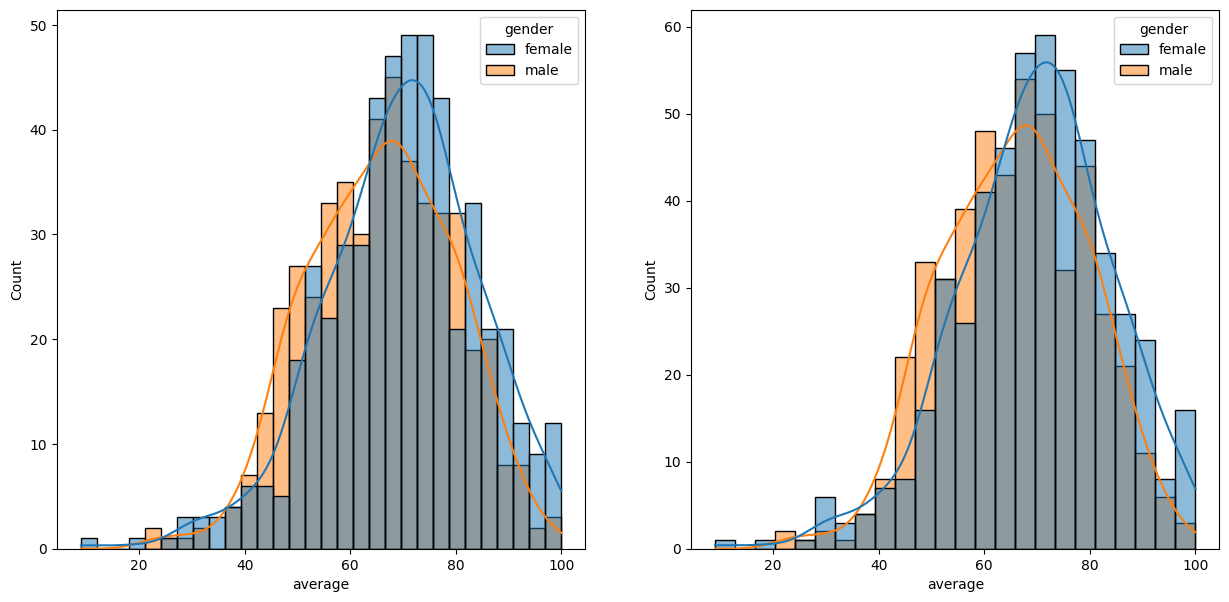

In [70]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g',hue='gender')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()
# fig, axs = plt.subplots(1, 2, figsize=(15,7))

<Axes: xlabel='total score', ylabel='Count'>

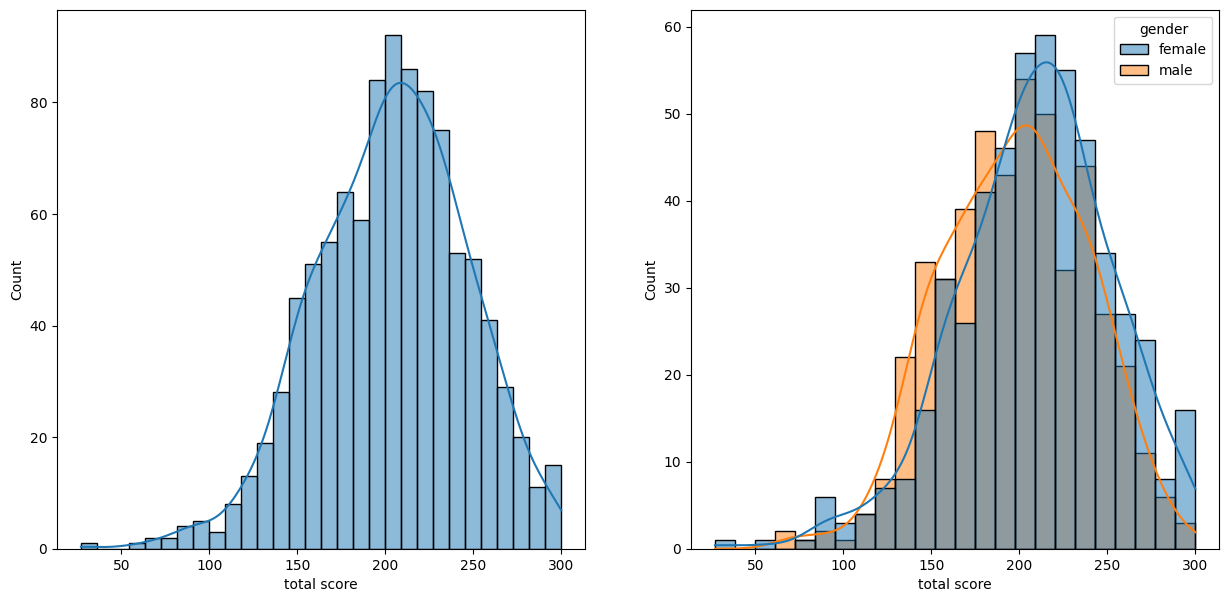

In [71]:
fig,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True)
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')

#### Insight
female students tend to perform well

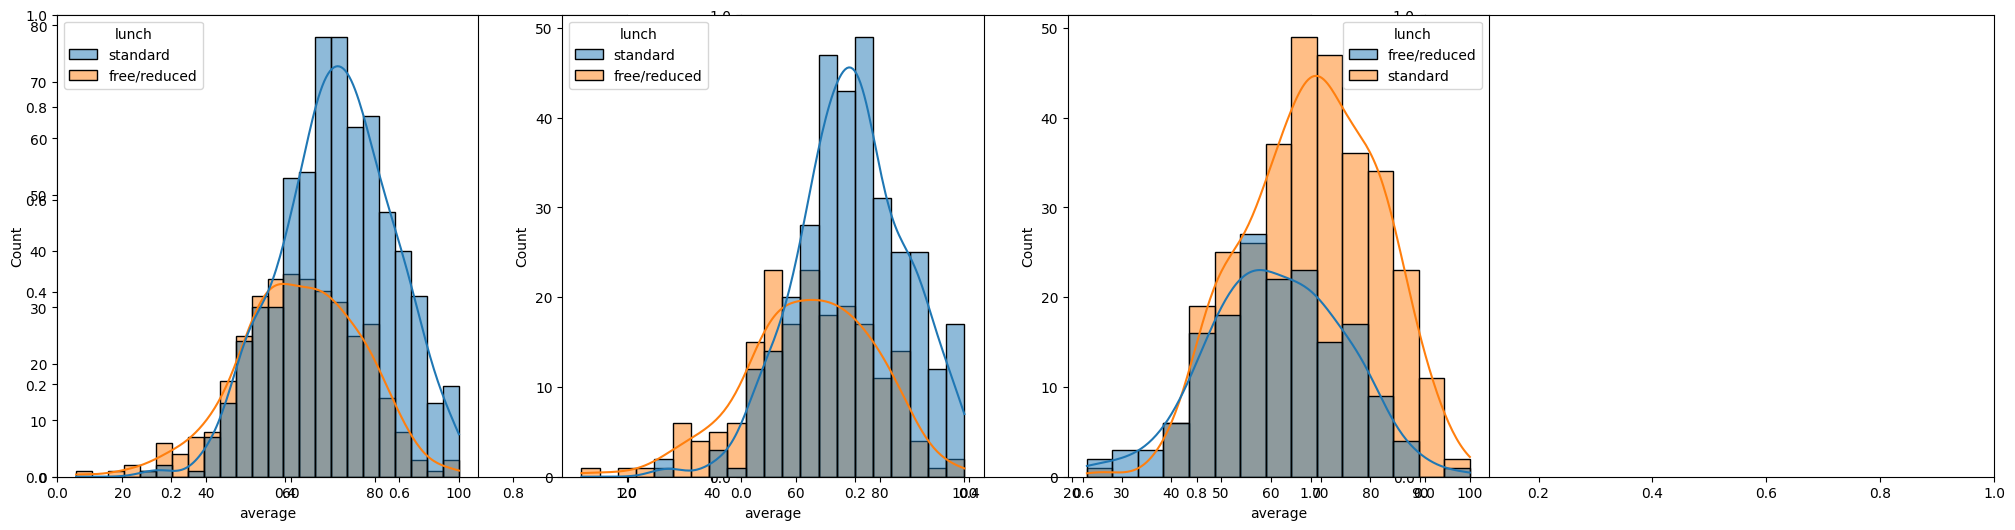

In [72]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insights
Standard lunch helps perform well in exams.
Standard lunch helps perform well in exams be it a male or a female.

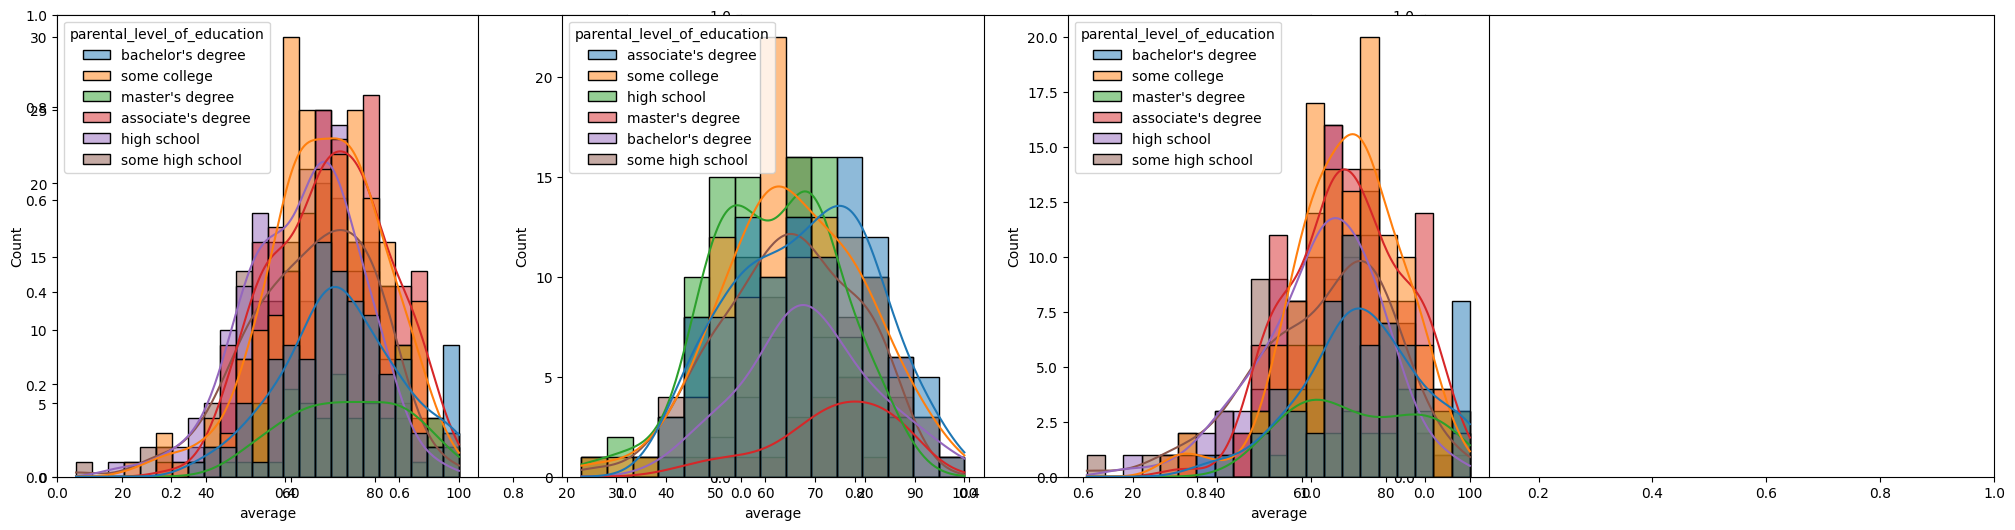

In [78]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()


##### Insight
In general parent's education don't help student perform well in exam.
2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3rd plot we can see there is no effect of parent's education on female students.

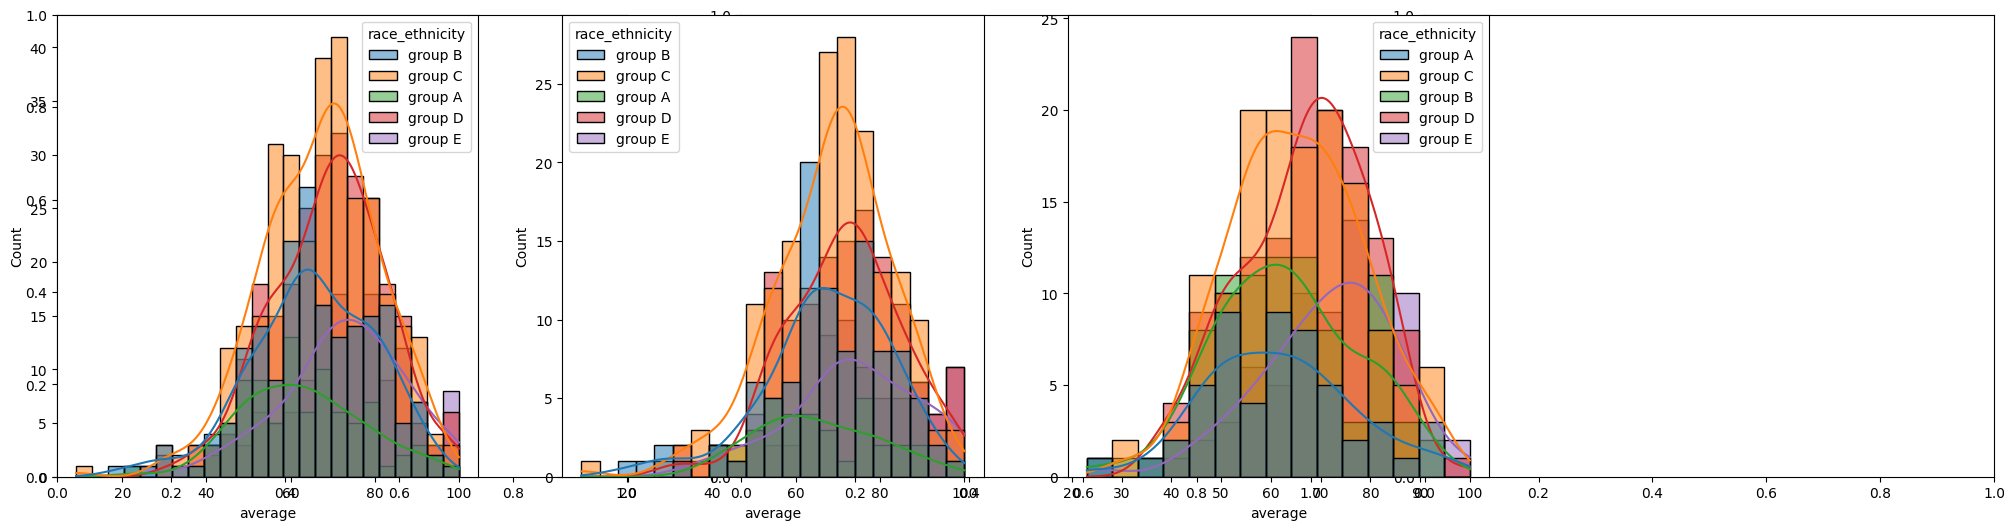

In [79]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()